# Data 422

Data Wrangling, S2 2019

## Assignement 1

**20% of final grade** Total marks is **100 marks** (70 for R, 30 for Julia).

## Due date: 11am Friday 23 August 2019

The assignment must be submitted on the DATA 201 and 422 Learn page and should be **your own work**.

### Avoid plagiarism (see this [video on academic plagiarism](https://www.youtube.com/embed/reGGPUrEsC0) ). If you are not sure what may constitute code plagiarism, read this [explanation on source code plagiarism](http://web.science.mq.edu.au/~mtaylor/ponline/index.php?id=source-code-plagiarism). Remember, when in doubt **declare your sources**. 

If you have any issues that affects your ability to work during the time allocated for the assignement, please DO CONTACT ME. We will find a suitable solution. In general this WON'T be an extension to the deadline (so that in the rest of the semester you are free from preoccupations). Most probably, I will ask you to submit what you have ready by the time the assignment is due, even if it is not everything we required, and I'll take into account special considerations. For any particular problem, please contact [Giulio Dalla Riva](giulio.dallariva@canterbury.ac.nz) or the TAs (using keybase).

## Instruction

For this assignment you will work with a _.csv_ data-set. Your goal is to read it in, wrangle it, produce some plotting, in order to demonstrate that you are able to use the functions, plotting, and markdown format we have been learning.  
You shall hand in your work as a jupyter-lab R notebook (for the R part, and jupyter-lab Julia notebook for the Julia part) comprehending the code, the plots and, **very important**, enough comments and explanations for us to understand what you did, how you did it, and why you did it. Remember: no comments, no marks.  
You can either modify this notebook or write a new one from scratch: in that case, clearly indicate which question you are asking at each step. Notice that you may well want to **use more than one cell** per answer (using some cell for the code, some for the text, and so forth).

## Comment, explain, present your work in a clear way (we may remove marks for messy notebooks)

## R part (overall 70 marks)

Do use the tidyverse syntax I introduced in class and labs. If in doubt, refresh the lab material 1 to 4.

The first thing you may want to do is to load **tidyverse**:

In [70]:
#Loading Library tidyverse
library(tidyverse)

### Task (a): import (5 marks)

Import the **hour.csv** dataset into R as a dataframe (we'll call it `bike_df`, but you can call it what you want). You can read about the dataset in the file `DataSet_Dictionary.txt`. (Alternatively, you might use your own .csv dataset of choice, but talk with me about it before doing it). 

Then perform the routine checks about the types of the columns, the missing values, and output a quick summary of the dataset.

_hint_ useful functions: `read_csv()`, `glimpse()`  
_hint_ useful libraries: `tidyverse`, `readr`, `skimr`, `vis_dat`

In [71]:
# your answer here
# Install and loads skimr and visdat libraries
remotes::install_github("ropensci/visdat")
library(skimr)
library(visdat)


Skipping install of 'visdat' from a github remote, the SHA1 (cd53490a) has not changed since last install.
  Use `force = TRUE` to force installation


In [72]:
# Reading csv file as dataframe df_bike
df_bike <- "hour.csv" %>%
    read_csv()

Parsed with column specification:
cols(
  instant = col_double(),
  dteday = col_date(format = ""),
  season = col_double(),
  yr = col_double(),
  mnth = col_double(),
  hr = col_double(),
  holiday = col_double(),
  weekday = col_double(),
  workingday = col_double(),
  weathersit = col_double(),
  temp = col_double(),
  atemp = col_double(),
  hum = col_double(),
  windspeed = col_double(),
  casual = col_double(),
  registered = col_double(),
  cnt = col_double()
)


In [73]:
# To display a short set of values of df_bike
df_bike %>%
    glimpse()

Observations: 17,379
Variables: 17
$ instant    <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,…
$ dteday     <date> 2011-01-01, 2011-01-01, 2011-01-01, 2011-01-01, 2011-01-0…
$ season     <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ yr         <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ mnth       <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ hr         <dbl> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, …
$ holiday    <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ weekday    <dbl> 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6…
$ workingday <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ weathersit <dbl> 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3…
$ temp       <dbl> 0.24, 0.22, 0.22, 0.24, 0.24, 0.24, 0.22, 0.20, 0.24, 0.32…
$ atemp      <dbl> 0.2879, 0.2727, 0.2727, 0.2879, 0.2879, 0.2576, 0.2727, 0.…
$ hum        <dbl

In [74]:
# Summary of dataframe and no.of columns and rows
df_bike %>%
    summary()
df_bike %>%
    nrow()
df_bike %>%
    ncol()

    instant          dteday               season            yr        
 Min.   :    1   Min.   :2011-01-01   Min.   :1.000   Min.   :0.0000  
 1st Qu.: 4346   1st Qu.:2011-07-04   1st Qu.:2.000   1st Qu.:0.0000  
 Median : 8690   Median :2012-01-02   Median :3.000   Median :1.0000  
 Mean   : 8690   Mean   :2012-01-02   Mean   :2.502   Mean   :0.5026  
 3rd Qu.:13034   3rd Qu.:2012-07-02   3rd Qu.:3.000   3rd Qu.:1.0000  
 Max.   :17379   Max.   :2012-12-31   Max.   :4.000   Max.   :1.0000  
      mnth              hr           holiday           weekday     
 Min.   : 1.000   Min.   : 0.00   Min.   :0.00000   Min.   :0.000  
 1st Qu.: 4.000   1st Qu.: 6.00   1st Qu.:0.00000   1st Qu.:1.000  
 Median : 7.000   Median :12.00   Median :0.00000   Median :3.000  
 Mean   : 6.538   Mean   :11.55   Mean   :0.02877   Mean   :3.004  
 3rd Qu.:10.000   3rd Qu.:18.00   3rd Qu.:0.00000   3rd Qu.:5.000  
 Max.   :12.000   Max.   :23.00   Max.   :1.00000   Max.   :6.000  
   workingday       weather

[1] 17379

[1] 17

In [75]:
# Detailed statistical observations of datafram df_bike
df_bike %>%
    skim() %>%
    kable()

Skim summary statistics  
 n obs: 17379    
 n variables: 17    

Variable type: Date

| variable | missing | complete |   n   |    min     |    max     |   median   | n_unique |
|----------|---------|----------|-------|------------|------------|------------|----------|
|  dteday  |    0    |  17379   | 17379 | 2011-01-01 | 2012-12-31 | 2012-01-02 |   731    |

Variable type: numeric

|  variable  | missing | complete |   n   |  mean  |   sd    |  p0  |  p25   | p50  |   p75   | p100  |   hist   |
|------------|---------|----------|-------|--------|---------|------|--------|------|---------|-------|----------|
|   atemp    |    0    |  17379   | 17379 |  0.48  |  0.17   |  0   |  0.33  | 0.48 |  0.62   |   1   | ▁▃▆▇▇▆▁▁ |
|   casual   |    0    |  17379   | 17379 | 35.68  |  49.31  |  0   |   4    |  17  |   48    |  367  | ▇▂▁▁▁▁▁▁ |
|    cnt     |    0    |  17379   | 17379 | 189.46 | 181.39  |  1   |   40   | 142  |   281   |  977  | ▇▅▂▂▁▁▁▁ |
|  holiday   |    0    |  17379   | 1

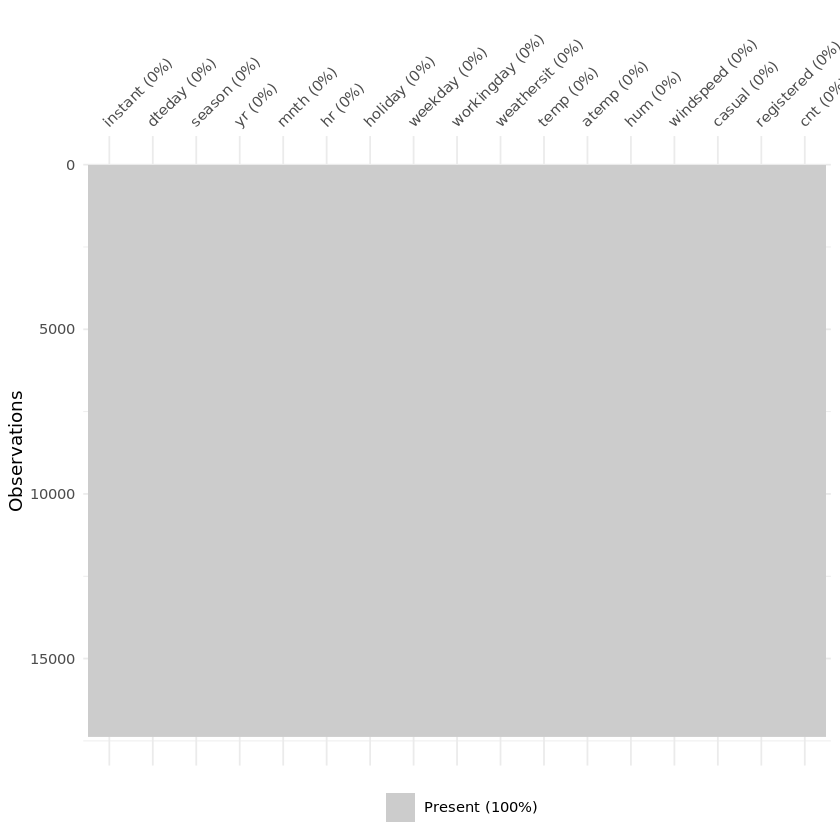

In [76]:
# Checking for missed values with visdat library
df_bike %>%
  vis_miss()

### Task (b): working on rows (10 marks)


Working on `bike_df`, show that you can operate on rows: arranging them, getting the top _n_ according to some variable of your choice, filtering them (eventually using your own functions).

_hint_ useful functions: `arrange()`, `top_n()`, `filter()`  
_hint_ to define a function: `myfunction <- function(myargument,anotherargument) { bodyofthefunction }`

In [77]:
# your answer here
# Reordering rows by column casual followed by registered
df_bike %>%
    arrange(casual,registered) %>%
    head(3)


instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
31,2011-01-02,1,0,1,7,0,0,0,2,0.40,0.4091,0.76,0.1940,0,1,1


In [78]:
# Selecting top entries by registered column
df_bike %>%
    top_n(n=5,wt=registered)

instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
14774,2012-09-12,3,1,9,18,0,3,1,1,0.66,0.6212,0.44,0.2537,91,886,977
14965,2012-09-20,3,1,9,17,0,4,1,1,0.64,0.6212,0.50,0.2239,91,885,976
15109,2012-09-26,4,1,9,17,0,3,1,1,0.74,0.6667,0.48,0.2985,77,876,953
15757,2012-10-23,4,1,10,17,0,2,1,1,0.68,0.6364,0.41,0.0000,67,871,938
15781,2012-10-24,4,1,10,17,0,3,1,1,0.66,0.6212,0.47,0.0000,87,876,963


In [79]:
# Using filter function to get rows corrsponding to season 3 only
df_bike %>%
    filter(season == 3) %>%
    tail(3)

instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
15017,2012-09-22,3,1,9,21,0,6,0,1,0.64,0.6212,0.57,0.2537,59,202,261
15018,2012-09-22,3,1,9,22,0,6,0,1,0.62,0.6212,0.57,0.1940,59,180,239
15019,2012-09-22,3,1,9,23,0,6,0,1,0.62,0.6212,0.50,0.1940,34,137,171


In [80]:
# A function created to findout rows where casual users> registered users
user_map <- function(df, output){  
    # 15th column is casual count and 16th column in registered count
    if(df[15]>df[16]) {
        cat(df[2],"Casual Count = ",df[15],"Registered Count = ",df[16],"\n")
    }
}
apply(df_bike, 1, user_map)

2011-01-01 Casual Count =    2 Registered Count =    0 
2011-01-01 Casual Count =    8 Registered Count =    6 
2011-01-02 Casual Count =    2 Registered Count =    1 
2011-01-10 Casual Count =    1 Registered Count =    0 
2011-01-16 Casual Count =    9 Registered Count =    6 
2011-01-28 Casual Count =    1 Registered Count =    0 
2011-02-02 Casual Count =    4 Registered Count =    0 
2011-02-17 Casual Count =    3 Registered Count =    1 
2011-02-17 Casual Count =    3 Registered Count =    1 
2011-02-19 Casual Count =  102 Registered Count =   94 
2011-02-20 Casual Count =  108 Registered Count =  104 
2011-02-21 Casual Count =    1 Registered Count =    0 
2011-02-27 Casual Count =    2 Registered Count =    1 
2011-03-02 Casual Count =    3 Registered Count =    1 
2011-03-02 Casual Count =    1 Registered Count =    0 
2011-03-04 Casual Count =    1 Registered Count =    0 
2011-03-07 Casual Count =    1 Registered Count =    0 
2011-03-08 Casual Count =    1 Registered Count 

NULL

### Task (c): working on columns (10 marks)

Working on `bike_df`, show that you can operate on columns: selecting some of them, dropping other, renaming them, reordering them, ...


_hint_ useful functions: `select()`, `rename()`, ...

In [81]:
# your answer here
# Selecting climate related fields only from dataframe
df_bike %>%
    select(dteday, temp, hum, windspeed) %>%
    head()

dteday,temp,hum,windspeed
<date>,<dbl>,<dbl>,<dbl>
2011-01-01,0.24,0.81,0.0000
2011-01-01,0.22,0.80,0.0000
2011-01-01,0.22,0.80,0.0000
2011-01-01,0.24,0.75,0.0000
2011-01-01,0.24,0.75,0.0000
2011-01-01,0.24,0.75,0.0896


In [82]:
# Renaming some messy field names to more locgical ones with rename function
df_bike %>%
    rename(Date=dteday,
    Season=season,
    Year_Binary=yr,
    Month=mnth,
    Hour=hr,
    Temperature=temp,
    Temperature_Feel=atemp,
    Humidity=hum,
    Total_Count=cnt
    ) %>%
    head()

instant,Date,Season,Year_Binary,Month,Hour,holiday,weekday,workingday,weathersit,Temperature,Temperature_Feel,Humidity,windspeed,casual,registered,Total_Count
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1


In [83]:
# Creation of subset of df_bike
# We are creating a new dataframe which consists of user counts and date fields
df_bike_count <- subset(df_bike, select = c(dteday, casual, registered, cnt))
df_bike_count %>%
    head()

dteday,casual,registered,cnt
<date>,<dbl>,<dbl>,<dbl>
2011-01-01,3,13,16
2011-01-01,8,32,40
2011-01-01,5,27,32
2011-01-01,3,10,13
2011-01-01,0,1,1
2011-01-01,0,1,1


In [84]:
# Overwriting dataframe after dropping first column
df_bike_count <- df_bike_count[,-1]
df_bike_count %>%
    head()

casual,registered,cnt
<dbl>,<dbl>,<dbl>
3,13,16
8,32,40
5,27,32
3,10,13
0,1,1
0,1,1


### Task (d): groups and not (10 marks)

Working on `bike_df`, show that you can produce new variables (columns) and modify existing one; show also that you can operate on the dataframe as a whole and on groups. See *Readme.txt* to get an understanding of the variable scaling applied.

_hint_ useful functions: `mutate()`, `group_by()`, `summarise()`, `tally()`, ...

In [118]:
# your answer here
# Grouping by season and finds median temperature of each season
df_bike %>%
    group_by(season) %>%
    summarise(median_temp = median(temp))

season,median_temp
<dbl>,<dbl>
1,0.28
2,0.56
3,0.70
4,0.42


In [86]:
# Real values of humidity is calculated and added as a new column real_hum
df_bike %>%
  mutate(real_hum = hum * 100) %>%
  head()

instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,real_hum
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,81
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,80
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,80
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,75
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,75
6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1,75


In [117]:
# Mutating type of numeric data to chr using mutate_if
df_bike %>%
  mutate_if(is.numeric, as.character) %>%
  head()

instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.8,0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.8,0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0,0,1,1
6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1


In [87]:
# Tally on grouped and normal
df_bike %>%
    group_by(season) %>%
    tally()
df_bike %>%
    tally()

season,n
<dbl>,<int>
1,4242
2,4409
3,4496
4,4232


n
<int>
17379


### Task (e): wide, long, tidy (10 marks)

Show that you can go back and forth between the long and the wide format of a dataframe. Then produce a tidy version of `bike_df` (or, if you think the original one is is already in the tidy data shape, explain why).

_hint_ useful functions: `spread()`, `gather()`, `na.omit()`, ...

In [88]:
# your answer here
# Creating wide dataframe with season categories as columns and values fillles with temperature
df_bike %>%
spread(key = season,
      value = temp)

instant,dteday,yr,mnth,hr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,casual,registered,cnt,1,2,3,4
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2011-01-01,0,1,0,0,6,0,1,0.2879,0.81,0.0000,3,13,16,0.24,NA,NA,NA
2,2011-01-01,0,1,1,0,6,0,1,0.2727,0.80,0.0000,8,32,40,0.22,NA,NA,NA
3,2011-01-01,0,1,2,0,6,0,1,0.2727,0.80,0.0000,5,27,32,0.22,NA,NA,NA
4,2011-01-01,0,1,3,0,6,0,1,0.2879,0.75,0.0000,3,10,13,0.24,NA,NA,NA
5,2011-01-01,0,1,4,0,6,0,1,0.2879,0.75,0.0000,0,1,1,0.24,NA,NA,NA
6,2011-01-01,0,1,5,0,6,0,2,0.2576,0.75,0.0896,0,1,1,0.24,NA,NA,NA
7,2011-01-01,0,1,6,0,6,0,1,0.2727,0.80,0.0000,2,0,2,0.22,NA,NA,NA
8,2011-01-01,0,1,7,0,6,0,1,0.2576,0.86,0.0000,1,2,3,0.20,NA,NA,NA
9,2011-01-01,0,1,8,0,6,0,1,0.2879,0.75,0.0000,1,7,8,0.24,NA,NA,NA


In [89]:
# Create length table using gather. Here columns mnth,hr,yr will be represented in rows
df_bike %>%
    gather(key = dteday,
      value = mnth,hr,yr) %>%
    na.omit()

instant,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,dteday,mnth
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,1,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,hr,0
2,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,hr,1
3,1,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,hr,2
4,1,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,hr,3
5,1,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,hr,4
6,1,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1,hr,5
7,1,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2,hr,6
8,1,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3,hr,7
9,1,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8,hr,8


The data seems to be very neat and tidy. The columns are normalized and no missing values are present.

### Task (f): plot (10 marks)

Produce a beautiful graphical representation of the data in `bike_df` or of _some_ of the data in `bike_df`. You can try different geometries, themes, mappings, ... . Make sure you label the plots with titles, and axis labels. Notice that the focus is on the use of *plotting as a data model*, rather than on the *statistical modelling* of the data.
\[ Hint: if you can't find any plotting idea, try focusing on the count of total rental bikes, and how it varies through time, season, weather, temperature, humidty, wind-speed. \]

_hint_ useful functions: `ggplot()`, `ylab()`, `xlab()`, `geom_...()`, `aes()`, `facet_...()`, ...

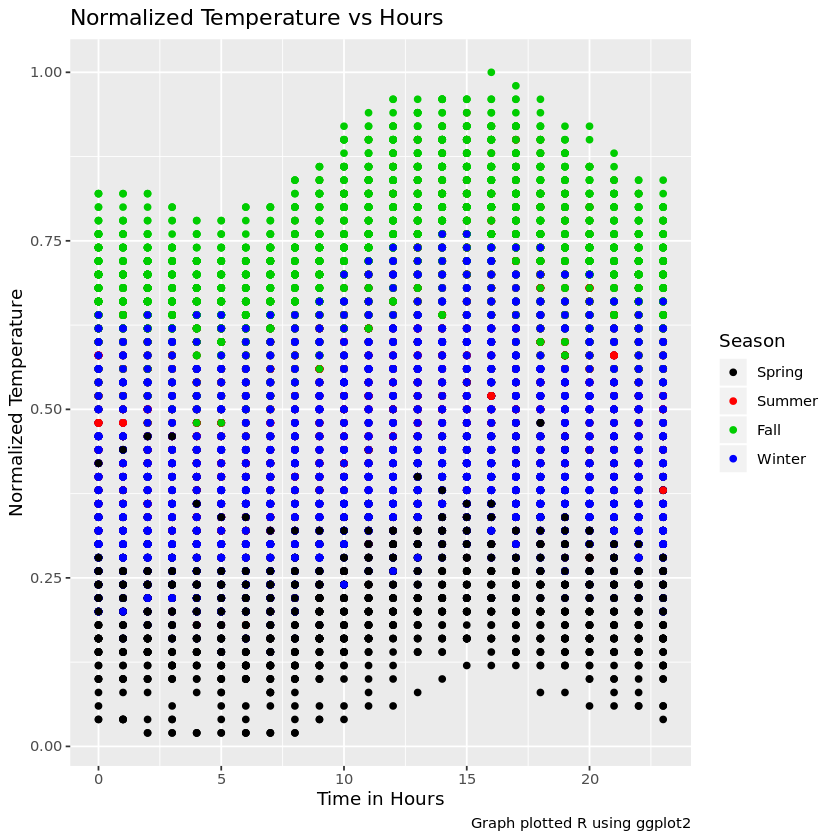

In [111]:
# your answer here
# Plotting hr vs temp with title,labels and caption
library(ggplot2)
ggplot(df_bike, aes(x = hr, y = temp)) +
    geom_point(aes(color = factor(season))) +
    xlab("Time in Hours") +
    ylab("Normalized Temperature") +
    labs(color = "Season",
        title = "Normalized Temperature vs Hours",
        caption = "Graph plotted R using ggplot2") +
# Adding manual labels to color factors.
# https://stackoverflow.com/questions/32490043/adding-manual-legend-in-ggplot
    scale_color_manual("Season", values=c("1","2","3","4"),
                     labels=c("Spring","Summer","Fall","Winter"))

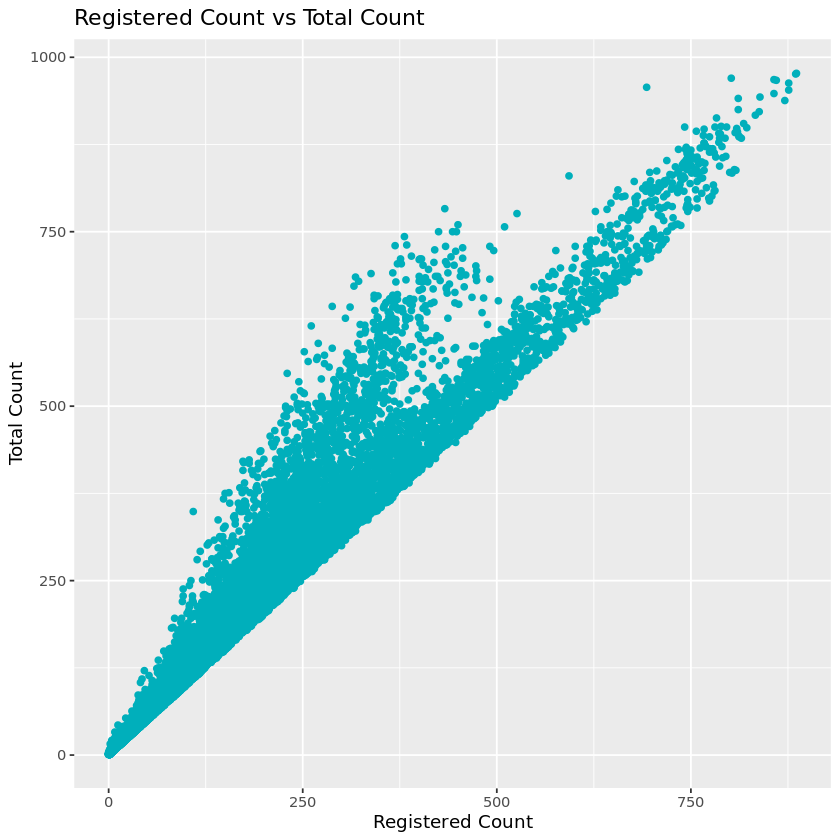

In [91]:
# Plotting registered count vs total count with title,labels which is a linear relationship
ggplot(df_bike, aes(x = registered, y = cnt)) +
    geom_point(color = "#00AFBB") +
    labs(x = "Registered Count",
        y = "Total Count",
        title = "Registered Count vs Total Count"
        )

### Task (g): save (5 marks)

Save your plot from Task (f) and your tidy dataset from Task (g) to disk. 

_hint_ useful functions: `write_csv()`, `ggsave()`,...

In [92]:
# your answer here
# Writing dataframe to CSV file
write_csv(df_bike, "bike.csv")

# The plot is saved as png using function ggsave(), lastplot() function takes the latest created plot
ggsave("tempvshr.png", plot = last_plot())

Saving 6.67 x 6.67 in image


### Challenge question (10 marks)

You are the data scientist working for a bike rental company. The `hour.csv` is the data you have available. The bike rental CEO sometimes wakes up in the morning with these strange ideas, and you get to test them.

One of the key element for the company is being sure that there are always enough bikes available for the users. So, we need to understand what makes a user rent a bike and what makes a user NOT rent a bike.
Your CEO noticed thinks that one of the peak times for the registered users renting bikes is between 6am and 10am.

Task (1): make a plot to check that (take seasonality into account in the plot).

She also thought about an interesting hypothesis. A registered user usually finish working around 5pm. Between 5pm and 10pm, they notice the weather: in particular, the registered users are sensible to how good the weather is, and how stable it is. The morning after, between 6am and 10am, the amount of registered users renting a bike to go to work depends on the previous afternoon weather.

Task (2): make one or more plot to test this hypothesis (again, consider seasonality in the plot).

\[ Hints: 

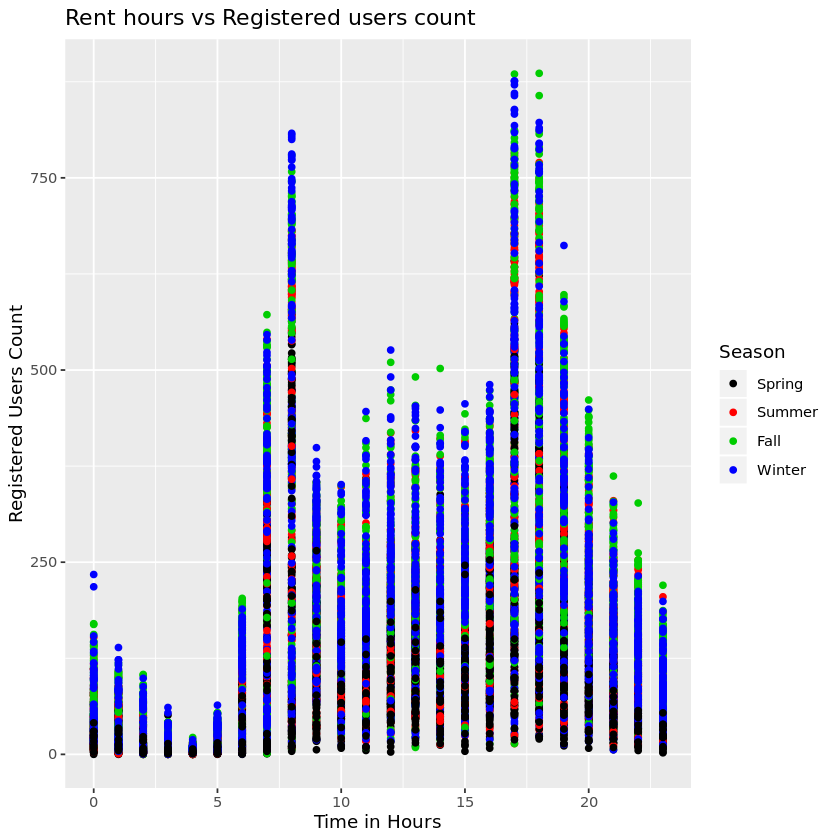

In [109]:
# Analysis of relationship between registered users, time and seasonality
# Using ggplot to plot relationships as scatter plot
# X axis - time, Y axis - Count of registered users, Factors - Season
library(ggplot2)
ggplot(df_bike, aes(x = hr, y = registered)) +
    geom_point(aes(color = factor(season))) +
    labs(x = "Time in Hours",
        y = "Registered Users Count",
        color = "Season",
        title = "Rent hours vs Registered users count") +
# https://stackoverflow.com/questions/32490043/adding-manual-legend-in-ggplot
    scale_color_manual("Season", values=c("1","2","3","4"),
                     labels=c("Spring","Summer","Fall","Winter"))

From the plot we can see a peak during 6 to 10 which support CEO's statement.Also we could observe the variation in count with respect to seasons.Most people are interested at renting during season 4.

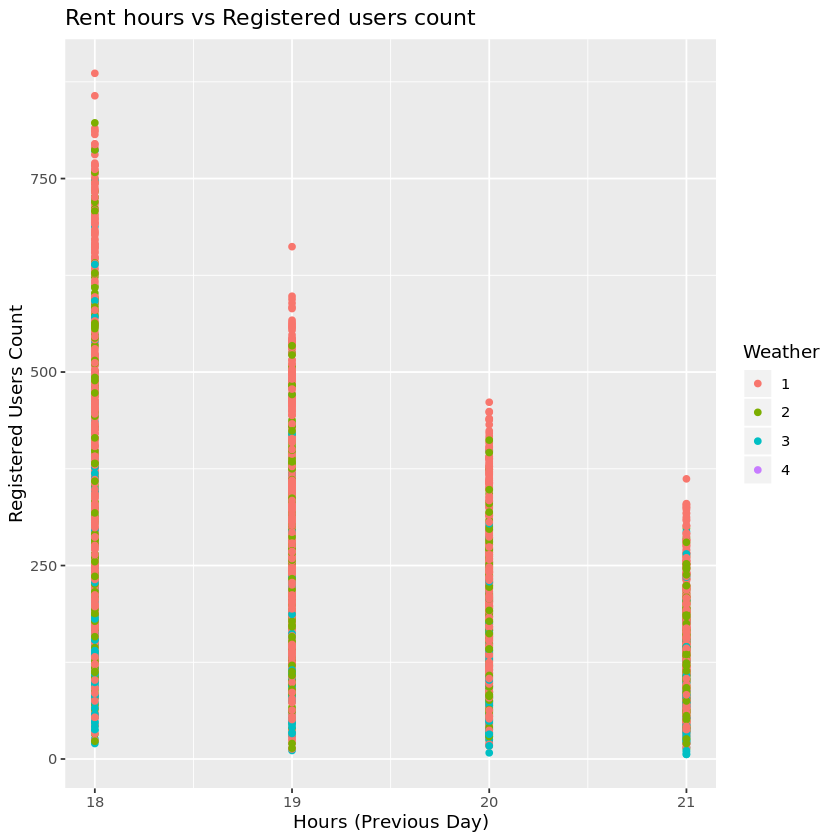

In [96]:
# Plotting registered users count with previous day weather
df_hr = df_bike %>%
    filter((hr>17 & hr<22))
df_hr$reg_shift <- c(df_hr$registered[2:nrow(df_hr)],1)
ggplot(df_hr, aes(x = hr, y = registered)) +
    geom_point(aes(color = factor(weathersit))) +
    labs(x = "Hours (Previous Day)",
        y = "Registered Users Count",
        color = "Weather",
        title = "Rent hours vs Registered users count") +


From the above plot we can summarize that people tend to rent bike more when previous evening is Clear, Few clouds, Partly cloudy, Partly cloudy (Weather 1).